# Subgraph Isomorphism: Real world applications

First let's define the Subgraph Isomorphism problem: 

Let $H$ and $G$ be graphs. $H$ is a subgraph of $G = (V, E)$ if

$\exists G_o = (V_o, E_o)$ / $V_o \subseteq  V \wedge E_o \subseteq E \cap V_o \times V_o \land  G_o $and $H$ are isomorphic

Let's see an example,

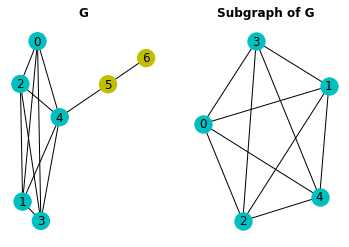

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

G = nx.lollipop_graph(5, 2)
colors = ["c" for i in range(0, 5)] + ["y" for i in range(5, 7)]

plt.subplot(121)
plt.title("G", fontweight="bold")
nx.draw_spring(G, with_labels = True, node_color =colors)
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(122)
plt.title("Subgraph of G",  fontweight="bold")
nx.draw_spring(nx.complete_graph(5), with_labels = True, node_color = "c")
plt.rcParams["figure.figsize"] = (10,5)

Many real-world structures can be represented using graphs. Some of them are involved in problems that can be solved using sub-graph isomorphism algorithms. In this notebook we will study two real-world applications: 
- Pattern Recognition in images 
- Proteins classification by structure

## Where's my phone?

Let's use subgraph isomorphism to find our phone in our messy desk. First, these are the images of our desk and phone:

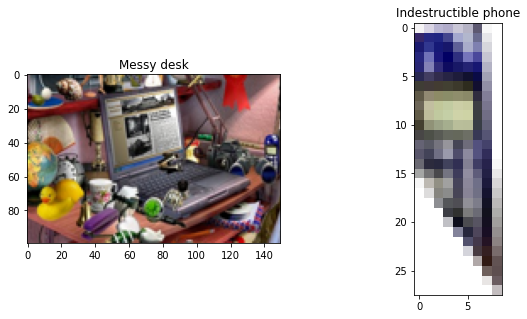

In [2]:
plt.subplot(121)
m = plt.imread('img/nocopy_150x100.png')
plt.imshow(m)
plt.title("Messy desk")

plt.subplot(122)
c = plt.imread('img/phone_color.png')
plt.imshow(c)
plt.title("Indestructible phone")
plt.show()

Image Source: https://pixabay.com/illustrations/computer-room-desk-toys-game-play-627220/

To simplify this problem, let's convert these images into grayscale. After this, the images will be a 2d array where each position represents a pixel. 
Also, let's define 0 (black pixel) as a null pixel. So we will have to delete all null pixels from our desk image. This will let us easily delete the background in the phone image.  

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
#Preprocessing: Delete black pixels 
I = rgb2gray(plt.imread('img/nocopy_150x100.png'))
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        if I[i][j] == 0:
            I[i][j] = 0.0001
plt.imsave('img/nocopy_150x100_p.png', I)

These will be the final images:

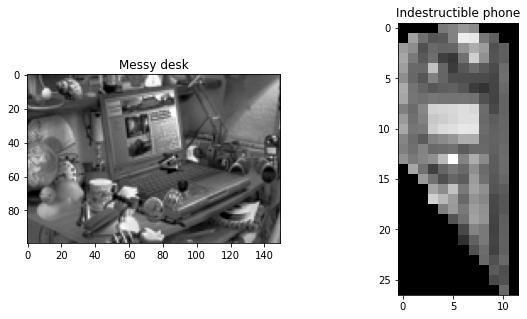

In [5]:
plt.subplot(121)

I = rgb2gray(plt.imread('img/nocopy_150x100_p.png')) #Desk
plt.imshow(I, cmap="gray")
plt.title("Messy desk")

plt.subplot(122)

I2 = rgb2gray(plt.imread('img/phone.png')) #Object to find
plt.imshow(I2, cmap="gray")
plt.title("Indestructible phone")
plt.show()

### Using Graphs to represent images

For this, we can use *grid_2d_graph(n, m)*. This function creates a $nxm$ grid where each coordinate is a node and each node is connected to its four nearest neighbors. 

For the phone graph, we will delete all the nodes corresponding to null pixels.


In [6]:
desk_graph = nx.grid_2d_graph(I.shape[0], I.shape[1])
phone_graph = nx.grid_2d_graph(I2.shape[0], I2.shape[1])

#assing pixel values as node attributes in desk 
for i in range(0, I.shape[0]):
    for j in range(0, I.shape[1]):
        desk_graph.nodes[(i, j)]["weight"] = I[i][j] 

#assing pixel values as node attributes in phone and delete useless nodes    
for i in range(0, I2.shape[0]):
    for j in range(0, I2.shape[1]):
        if I2[i][j] != 0:
            phone_graph.nodes[(i, j)]["weight"] = I[i][j]
        else:
            phone_graph.remove_node((i,j))

Let's see how the phone_graph looks like coloring the nodes. 

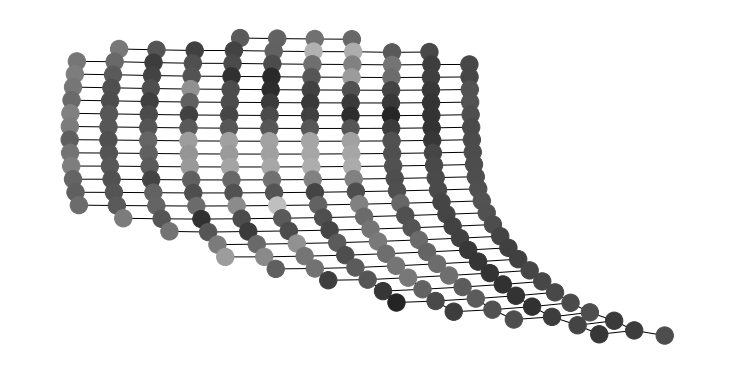

In [7]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize, rgb2hex

#Match values to colors in RGB
def color_map_color(value, cmap_name='gray', vmin=0, vmax=1):
    norm = Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value)))[:3]
    color = rgb2hex(rgb)
    return color

#Get RGB colors of the phone photo
I2_colors = []
for i in range(0, I2.shape[0]):
    for j in range(0, I2.shape[1]):
        if I2[i][j] != 0:
            I2_colors.append( color_map_color(I2[i][j]) )

nx.draw_kamada_kawai(phone_graph, node_color =I2_colors) 

Finally, let's see if we can match our phone graph to the desk graph.

#### TODO: Explaind more about the node match and the graph matcher 

In [8]:
import networkx.algorithms.isomorphism as iso

em = iso.numerical_node_match("weight", 10^-10) #Match node weight attributes 

g = iso.GraphMatcher(desk_graph, phone_graph, node_match=em)

g.subgraph_is_isomorphic()

True

Also, we can check that the desk and phone graphs are not isomorphic. 

In [9]:
nx.is_isomorphic(desk_graph, phone_graph, node_match=em)

False

## Proteins Secondary structure

Proteins are large biomolecules and macromolecules that comprise one or more long chains of amino acid residues. Proteins are key in many biological processes within organisms. 

Proteins differ from one another primarily in their sequence of amino acids, which is dictated by the nucleotide sequence of their genes, and which usually results in protein folding into a specific 3D structure that determines its activity.

Biochemists often refer to four distinct aspects of a protein's structure. We will be interested in the secondary and tertiary structure.  

**Secondary Structure** : regularly repeating local structures stabilized by hydrogen bonds. The most common examples are the α-helix, β-sheet, and turns. Because secondary structures are local, many regions of different secondary structures can be present in the same protein molecule.

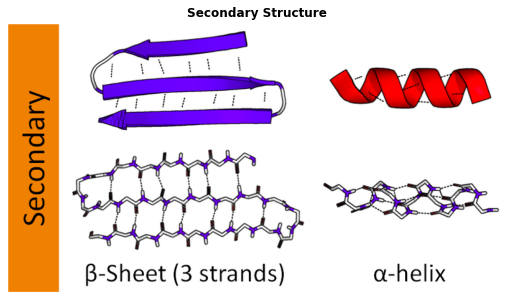

In [10]:
plt.imshow(plt.imread('img/2_structure.png'))
plt.title("Secondary Structure", fontweight = "bold")
plt.axis('off')
plt.rcParams["figure.figsize"] = (2,2)
plt.show()

**Tertiary Structure** :  is the 3D shape of a protein. This structure have information of the interactions between the R groups of the amino acids that make up the protein. Let's see how some proteins tertiary structure looks like:

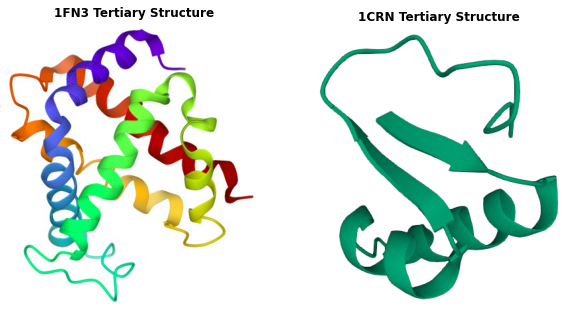

In [27]:
plt.subplot(121)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(plt.imread('img/1fn3.png'))
plt.title("1FN3 Tertiary Structure", fontweight = "bold")
plt.axis('off')


plt.subplot(122)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(plt.imread('img/1crn.png'))
plt.title("1CRN Tertiary Structure", fontweight = "bold")
plt.axis('off')
plt.show()

Many graph representations can be built from the Secondary and Tertiary Structure. Each representation capture different information about the protein. For example, 
- Use α-helix and β-sheet as nodes and the interaction energy between them to define edges. 

- $C_\alpha$ Networks: Cα atom of an amino acid residue is considered a node and an edge are drawn if the Cα distance between a pair of residues is within a threshold distance. Cα atoms are in the α-helix structure. It is one of the simplest and most widely analyzed protein contact networks that captures very well the 3D topology of protein structure.


We will work on $C_\alpha$ networks. 

Let's see graphs of proteins with PDB codes 1CRN(Plant protein), 1FN3(oxygen storage/transport in the human body) and 1EGJ(Plant Protein). 

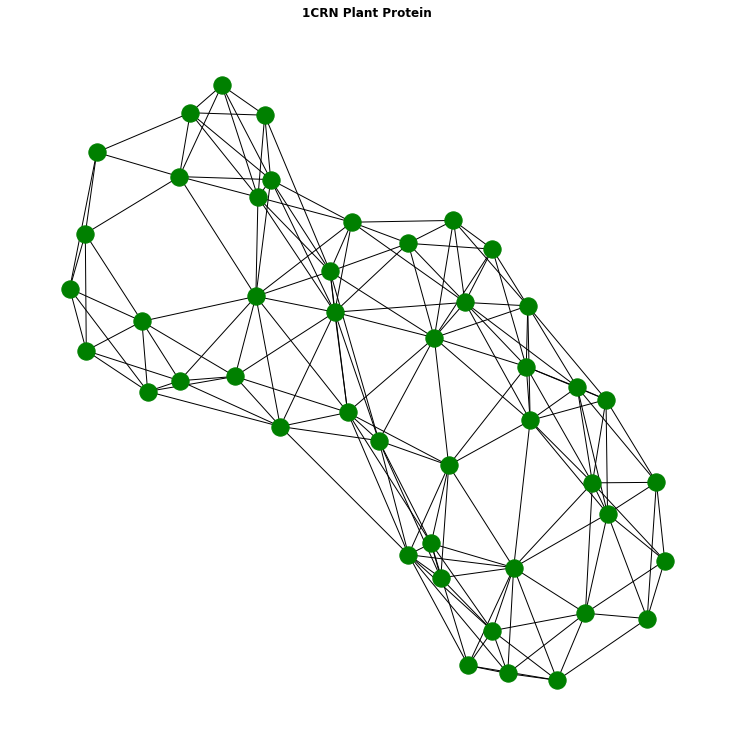

In [12]:
p_1CRN = nx.read_edgelist("data/1CRN_edgelist.txt", nodetype=str)
nx.draw_spring(p_1CRN, node_color ="g")
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("1CRN Plant Protein", fontweight = "bold")
plt.show()

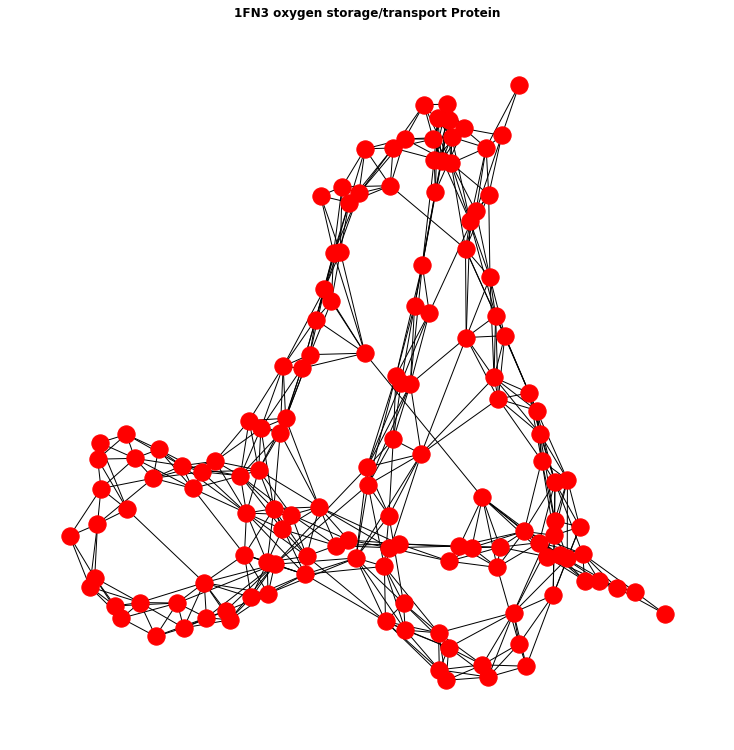

In [28]:
p_1FN3 = nx.read_edgelist("data/1FN3_edgelist.txt", nodetype=str)
nx.draw_spring(p_1FN3, node_color = "r")
plt.rcParams["figure.figsize"] = (7,7)
plt.title("1FN3 oxygen storage/transport Protein", fontweight = "bold")
plt.show()

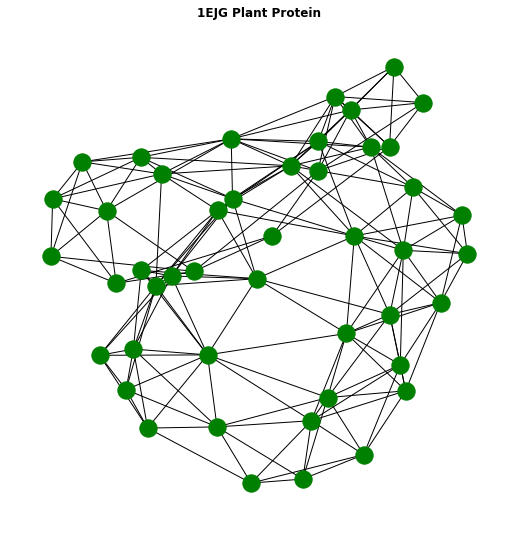

In [14]:
p_1EJG = nx.read_edgelist("data/1EJG_edgelist.txt", nodetype=str)
nx.draw_spring(p_1EJG, node_color = "g")
plt.title("1EJG Plant Protein", fontweight = "bold")
plt.show()

We can identify graphlets (induced subgraphs) that are present in these graphs and use that to classify proteins. We can extract some subgraphs from the proteins and test if they are present in other proteins. Let's find a subgraph of 1CRN that is also a subgraph of 1EJG but not of 1FN3. This is interenting because 1CRN and 1EJG are both plant proteins but 1FN3 is not. But clearly to decide if this graphlet is particular of plant proteins we should test it in more proteins. 

Graphlet present in 1CRN  True
Graphlet present in 1FN3 False
Graphlet present in 1EJG True


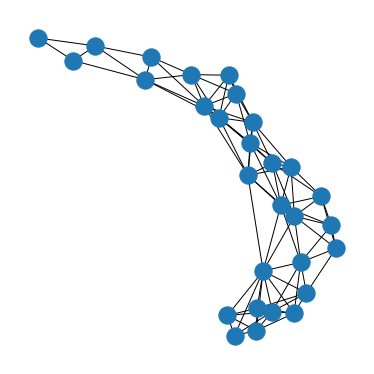

In [32]:
#Get a induced subgraph from 1CRN
graphlet = p_1CRN.subgraph(["A"+str(i) for i in range(0, 30)])
plt.rcParams["figure.figsize"] = (5,5)
nx.draw(graphlet)

#Test if the graphlet is a subgraph of each protein 
g1 = iso.GraphMatcher(p_1CRN, graphlet)
print("Graphlet present in 1CRN ", g1.subgraph_is_isomorphic())

g2 = iso.GraphMatcher(p_1FN3, graphlet)
print("Graphlet present in 1FN3" ,g2.subgraph_is_isomorphic())

g3 = iso.GraphMatcher(p_1EJG, graphlet)
print("Graphlet present in 1EJG", g3.subgraph_is_isomorphic())

On a similar way we can find a graphlet in 1FN3 that is not present in 1CRN and 1EJG.

Graphlet present in 1CRN  False
Graphlet present in 1FN3 True
Graphlet present in 1EJG False


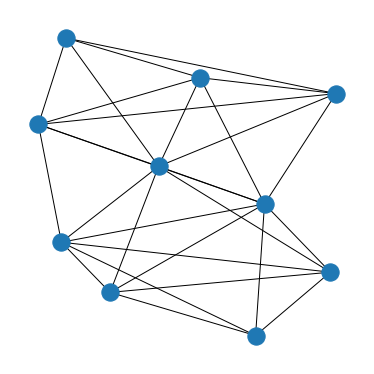

In [33]:
#Get a induced subgraph from 1FN3
graphlet = p_1FN3.subgraph(["A"+str(i) for i in range(100, 110, 1)])
plt.rcParams["figure.figsize"] = (5,5)
nx.draw(graphlet)

#Test if the graphlet is a subgraph of each protein 
g1 = iso.GraphMatcher(p_1CRN, graphlet)
print("Graphlet present in 1CRN ", g1.subgraph_is_isomorphic())

g2 = iso.GraphMatcher(p_1FN3, graphlet)
print("Graphlet present in 1FN3" ,g2.subgraph_is_isomorphic())

g3 = iso.GraphMatcher(p_1EJG, graphlet)
print("Graphlet present in 1EJG", g3.subgraph_is_isomorphic())

Another option is to use randomly generated graphs given a certain number of nodes, for example, using Erdos-graphs generators. *erdos_renyi_graph(n, p, seed)* generates a graph of n nodes in which all possible edges are added with probability p. We can find a random graphs that is present in 1FN3 but not in 1CRN and 1EJG. 

Random graph present in 1CRN  False
Random graph present in 1FN3 True
Random graph present in 1EJG False


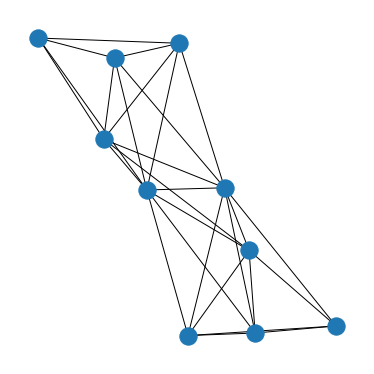

In [37]:
random_graph = nx.erdos_renyi_graph(7, 0.9, seed = 8)
nx.draw(graphlet)

#Test if the random graph is a subgraph of each protein 
g1 = iso.GraphMatcher(p_1CRN, random_graph)
print("Random graph present in 1CRN ", g1.subgraph_is_isomorphic())

g2 = iso.GraphMatcher(p_1FN3, random_graph)
print("Random graph present in 1FN3" ,g2.subgraph_is_isomorphic())

g3 = iso.GraphMatcher(p_1EJG, random_graph)
print("Random graph present in 1EJG", g3.subgraph_is_isomorphic())

Also there are some graphlets ans random graphs that are present in all proteins, for example: 

Random graph present in 1CRN  True
Random graph present in 1FN3 True
Random graph present in 1EJG True


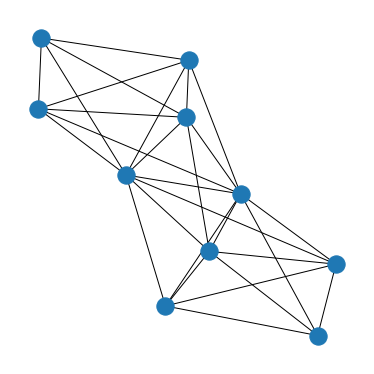

In [36]:
random_graph = nx.erdos_renyi_graph(5, 0.9, seed = 8)
nx.draw(graphlet)

#Test if the random graph is a subgraph of each protein 
g1 = iso.GraphMatcher(p_1CRN, random_graph)
print("Random graph present in 1CRN ", g1.subgraph_is_isomorphic())

g2 = iso.GraphMatcher(p_1FN3, random_graph)
print("Random graph present in 1FN3" ,g2.subgraph_is_isomorphic())

g3 = iso.GraphMatcher(p_1EJG, random_graph)
print("Random graph present in 1EJG", g3.subgraph_is_isomorphic())

This technique can have many applications, for example, building tree-classification models. But in order to find graphlets and random graphs that are useful to clasify proteins it's important to test multiple proteins and also identify is those graphs are more present in some proteins than in random graphs. 

### References 
- https://en.wikipedia.org/wiki/Protein
- https://en.wikipedia.org/wiki/Protein_secondary_structure
- https://www.rcsb.org/docs/general-help/organization-of-3d-structures-in-the-protein-data-bank
- Chakrabarty B. and Parekh N., "NAPS: Network Analysis of Protein Structures", Nucleic Acids Research, 2016, Vol. 44, Web Server issue W375–W382
https://bioinf.iiit.ac.in/NAPS/index.php
- Vishveshwara S.,Brinda K. V. and Kannan N., "Protein Structure: Insights from graph theory", Journal of Theoretical and Computational Chemistry, Vol. 1, No. 1 (2002) 000–000.
- Henneges C., Röttig M., Kohlbacher O., Zell A., "Graphlet data mining of energetical interaction patterns in protein 3D structures", ICFC-ICNC 2010 - Proceedings of the International Conference on Fuzzy Computation and International Conference on Neural Computation, Valencia, Spain, October 24-26, 2010
https://www.researchgate.net/publication/221616535_Graphlet_Data_Mining_of_Energetical_Interaction_Patterns_in_Protein_3D_Structures